## Problema 1 Word Cloud


In [ ]:
import pandas as pd
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
columnas = ['ID', 'Timestamp', 'Query', 'Username', 'Content']
df = pd.read_csv('/content/drive/MyDrive/ProyectoFinalTM/tw_source.csv',  names=columnas, header=None, encoding='latin1')
df.head(10)

,ID,Timestamp,Query,Username,Content
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [ ]:
import re
from collections import Counter


df['Mentions'] = df['Content'].apply(lambda x: re.findall(r'@\w+', x))
all_mentions = [mention for sublist in df['Mentions'] for mention in sublist]
top_users = Counter(all_mentions).most_common(3)
print(f"Los 3 usuarios más populares: {top_users}")

Los 3 usuarios más populares: [('@mileycyrus', 4500), ('@tommcfly', 3887), ('@ddlovato', 3467)]


In [ ]:
def create_corpus(user, df):
    user_tweets = df[df['Content'].str.contains(user, regex=False)]

    corpus = {
        'Content': user_tweets['Content'],
        'ID': user_tweets['ID'],
        'Timestamp': user_tweets['Timestamp'],
        'Length': user_tweets['Content'].apply(len)  # Longitud del tweet
    }

    return pd.DataFrame(corpus)

corpus_1 = create_corpus(top_users[0][0], df)
corpus_2 = create_corpus(top_users[1][0], df)
corpus_3 = create_corpus(top_users[2][0], df)

corpus_1.head()

,Content,ID,Timestamp,Length
0,@mileycyrus hahaha dont be like that one time ...,1468063101,Mon Apr 06 23:30:57 PDT 2009,107
0,"@mileycyrus i have the same problem, but it's ...",1468286517,Tue Apr 07 00:45:20 PDT 2009,137
0,@mileycyrus I guess counting sheep didn't work...,1468297110,Tue Apr 07 00:49:07 PDT 2009,72
0,@mileycyrus I would too if it meant spending a...,1468298918,Tue Apr 07 00:49:44 PDT 2009,100
0,@mileycyrus AWWW u seriously have the cutest d...,1468318249,Tue Apr 07 00:56:41 PDT 2009,112


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word.lower() not in stop_words])

corpus_1['Content_clean'] = corpus_1['Content'].apply(remove_stopwords)
corpus_2['Content_clean'] = corpus_2['Content'].apply(remove_stopwords)
corpus_3['Content_clean'] = corpus_3['Content'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk

# Descargar el recurso 'wordnet' para la lematización
nltk.download('wordnet')

# También es útil descargar 'omw-1.4' (Open Multilingual Wordnet) para garantizar la funcionalidad en múltiples idiomas
nltk.download('omw-1.4')

# Si planeas eliminar stopwords, también descarga las stopwords
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

stemmer = SnowballStemmer('spanish')
lemmatizer = WordNetLemmatizer()

def stem_and_lemmatize(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    return ' '.join(lemmatized_words)

corpus_1['Content_processed'] = corpus_1['Content_clean'].apply(stem_and_lemmatize)
corpus_2['Content_processed'] = corpus_2['Content_clean'].apply(stem_and_lemmatize)
corpus_3['Content_processed'] = corpus_3['Content_clean'].apply(stem_and_lemmatize)

In [ ]:
def extract_context(user, text):
    pattern = rf"(\w+)\s*{user}\s*(\w+)"
    matches = re.findall(pattern, text)
    context_words = [word for match in matches for word in match]
    return ' '.join(context_words)

# Aplicar la extracción de contexto para cada usuario
corpus_1['Context'] = corpus_1['Content_processed'].apply(lambda x: extract_context(top_users[0][0], x))
corpus_2['Context'] = corpus_2['Content_processed'].apply(lambda x: extract_context(top_users[1][0], x))
corpus_3['Context'] = corpus_3['Content_processed'].apply(lambda x: extract_context(top_users[2][0], x))

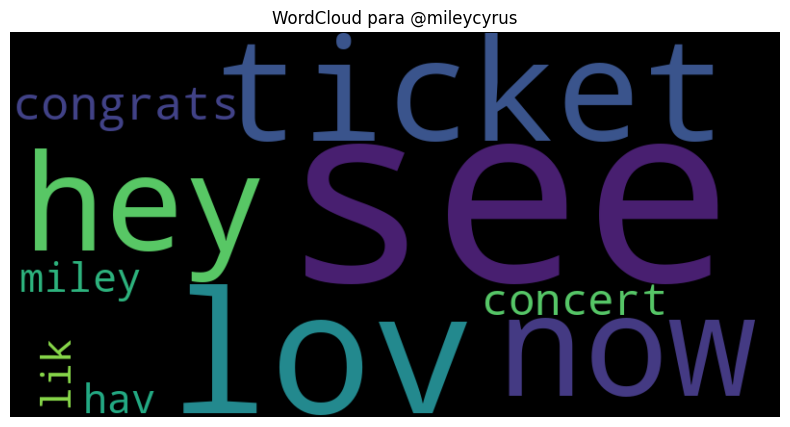

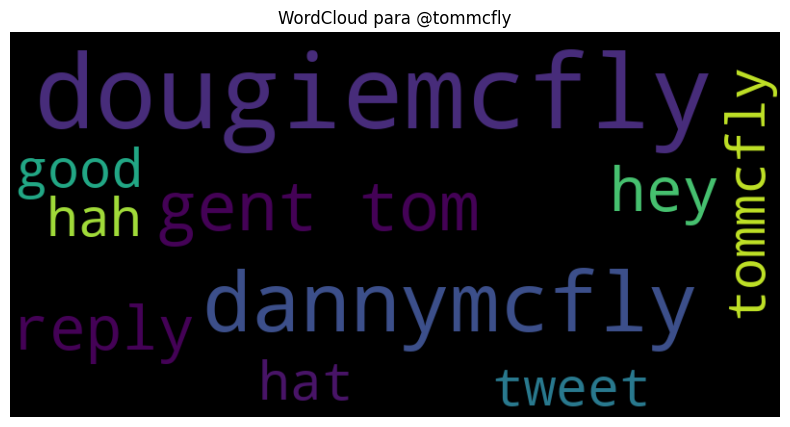

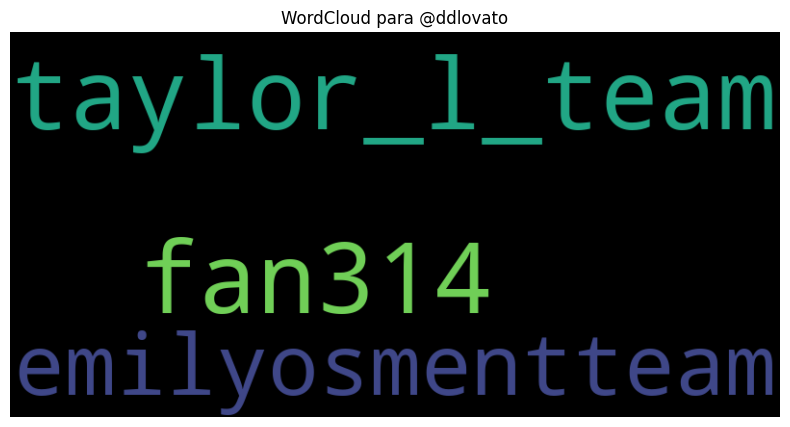

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(text, user):
    wordcloud = WordCloud(width=800, height=400, max_words=10).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud para {user}")
    plt.axis('off')
    plt.show()

create_wordcloud(' '.join(corpus_1['Context']), top_users[0][0])
create_wordcloud(' '.join(corpus_2['Context']), top_users[1][0])
create_wordcloud(' '.join(corpus_3['Context']), top_users[2][0])

## Problema 2: Problema 2 - Fruits and Vegetables Recognizer

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
import numpy as np

In [ ]:
ruta_drive = '/content/drive/MyDrive/ProyectoFinalTM'

# Crear una nueva carpeta en Drive para guardar las imágenes transformadas
carpeta_nueva = os.path.join('/content/drive/MyDrive/ProyectoFinalTM', 'imagenes_transformadas')
os.makedirs(carpeta_nueva, exist_ok=True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import os

# Modificaciones (Data Augmentation)
modificaciones = ImageDataGenerator(
    rotation_range=20,        # Rotar las imágenes hasta 20 grados
    width_shift_range=0.2,    # Desplazamiento horizontal
    height_shift_range=0.2,   # Desplazamiento vertical
    shear_range=0.2,          # Inclinación
    zoom_range=0.2,           # Zoom en las imágenes
    horizontal_flip=True,     # Voltear horizontalmente
    fill_mode='nearest',      # Llenar los espacios vacíos tras la transformación
    rescale=1.0/255.0         # Normalización entre 0 y 1
)

# Lista de imágenes en la carpeta de Google Drive
imagenes = ['freshApple.jpg', 'freshCarrot.jpg', 'freshMango.jpg',
            'freshOrange.jpg', 'freshPotato.jpg', 'freshTomato.png']

# Función para generar nombres de archivos basados en la transformación
def generate_filename(original_name, transformation, count):
    base_name, ext = os.path.splitext(original_name)
    return f"{base_name}_{transformation}_{count}{ext}"

# Transformaciones y guardado de imágenes
for imgg in imagenes:
    imagen_path = os.path.join(ruta_drive, imgg)  # Ruta completa en Google Drive

    # Cargar la imagen
    img = load_img(imagen_path, target_size=(150, 150))  # Redimensionar a 150x150
    img_array = img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)  # Cambiar la forma para ImageDataGenerator

    # Aplicar las transformaciones
    i = 0
    for batch in modificaciones.flow(img_array, batch_size=1, save_to_dir=None):
        transformed_img = array_to_img(batch[0])  # Convertir el batch a imagen
        transformacion = f"transform_{i + 1}"
        nombre_archivo = generate_filename(imgg, transformacion, i + 1)
        imagen_de_salida = os.path.join(carpeta_nueva, nombre_archivo)  # Guardar en la nueva carpeta de Google Drive

        # Guardar la imagen transformada
        transformed_img.save(imagen_de_salida)

        i += 1
        if i >= 4:  # Generar y guardar 4 imágenes aumentadas por cada original
            break

print(f"Imágenes transformadas guardadas en: {carpeta_nueva}")


Imágenes transformadas guardadas en: /content/drive/MyDrive/ProyectoFinalTM/imagenes_transformadas
